In [1]:
#downloading required libraries for our project 

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
match=pd.read_csv(r"C:\Users\pk859\OneDrive\Desktop\datasets\ipl\matches.csv")

In [5]:
delivery=pd.read_csv(r"C:\Users\pk859\OneDrive\Desktop\datasets\ipl\deliveries.csv")

In [6]:
delivery.sample(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
86136,365,1,Rajasthan Royals,Pune Warriors,6,3,SR Watson,AM Rahane,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
113977,481,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,5,NV Ojha,DA Warner,VR Aaron,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
63487,268,2,Pune Warriors,Royal Challengers Bangalore,13,5,Yuvraj Singh,MK Pandey,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
67925,287,2,Mumbai Indians,Kings XI Punjab,2,6,SR Tendulkar,AC Blizzard,BA Bhatt,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
102671,433,2,Rajasthan Royals,Delhi Daredevils,7,6,R Dravid,AM Rahane,P Negi,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [7]:
total_score_df=delivery.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()

C:\Users\pk859\AppData\Local\Temp\ipykernel_588\692496792.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df=delivery.groupby(["match_id","inning"]).sum()["total_runs"].reset_index()


In [8]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [9]:
total_score_df=total_score_df[total_score_df["inning"]==1]      #extracted the values of the first innings only

In [10]:
#created a new dataframe by mergeing two dataframes so, that we can have total runs in our desired dataset only

In [11]:
match_df=match.merge(total_score_df[["match_id","total_runs"]],left_on="id",right_on="match_id") 

In [12]:
match_df.sample(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
664,7922,IPL-2018,Bengaluru,29-04-2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,CA Lynn,M Chinnaswamy Stadium,Nigel Llong,Anil Chaudhary,Virender Kumar Sharma,7922,185
80,81,IPL-2008,Chandigarh,03-05-2008,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN,81,178
486,487,IPL-2014,Ahmedabad,08-05-2014,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Sunrisers Hyderabad,32,0,B Kumar,"Sardar Patel Stadium, Motera",AK Chaudhary,NJ Llong,NaN,487,134
109,110,IPL-2008,Chennai,24-05-2008,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",DJ Harper,SL Shastri,NaN,110,211
115,116,IPL-2008,Mumbai,31-05-2008,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,bat,normal,0,Chennai Super Kings,0,9,M Ntini,Wankhede Stadium,Asad Rauf,DJ Harper,NaN,116,112


In [13]:
match_df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
#going to replace delhi daredevils to delhi capital and deccan charges to sunrisers heydrabad

In [15]:
teams=[
    
    "Sunrisers Hyderabad","Mumbai Indians","Royal Challengers Bangalore","Kolkata Knight Riders","Kings XI Punjab","Chennai Super Kings",
    "Rajasthan Royals","Delhi Capitals"

]

In [16]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [17]:
match_df["team1"]=match_df["team1"].str.replace("Delhi Daredevils","Delhi Capitals")

In [18]:
match_df["team2"]=match_df["team2"].str.replace("Delhi Daredevils","Delhi Capitals")

In [19]:
match_df["team1"]=match_df["team1"].str.replace("Deccan Charges","Sunrisers Hyderabad")
match_df["team2"]=match_df["team2"].str.replace("Deccan Charges","Sunrisers Hyderabad")

In [20]:
#match_df me sirf vahi teams dikhengi jo teams wali list me h agar vo teams list me nahi h to vo
#match df dataframe se delete ho jayengi

In [21]:
match_df=match_df[match_df["team1"].isin(teams)]
match_df=match_df[match_df["team2"].isin(teams)]

In [22]:
match_df.shape

(571, 20)

In [23]:
#removeing rain affected match means , dl_applied is 1 so removing all those mathces

In [24]:
match_df=match_df[match_df["dl_applied"]==0]

In [25]:
match_df=match_df[["match_id","city","winner","total_runs"]]

In [26]:
#merged the both dataset of match_df and delivery so that we can get data according  to ball or we can get data by ball by ball

In [27]:
delivery_df=match_df.merge(delivery,on="match_id")

In [28]:
delivery_df=delivery_df[delivery_df["inning"]==2]

In [29]:
delivery_df.shape

(64192, 24)

In [30]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [31]:
#abb hum runs nikalenge ki 1 ball ke baad kitne runs h aur 2 balls ke baad 
#kitne runs h so that hum nikal ske ki kitne runs aur chase krne h .
#for the 2nd innings jo ki hme target mil chuka h 

In [32]:
# here .comsum() function calculate the cumulative sumn so that can cvalculate cumulation sum after each and every ball

In [33]:
delivery_df["current_score"]=delivery_df.groupby("match_id").cumsum()["total_runs_y"]

C:\Users\pk859\AppData\Local\Temp\ipykernel_588\2217433099.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df["current_score"]=delivery_df.groupby("match_id").cumsum()["total_runs_y"]


In [34]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [35]:
delivery_df["runs_left"]=delivery_df["total_runs_x"]-delivery_df["current_score"]

In [36]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,204
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,0
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-2
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-3
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-5


In [37]:
#now calculating the balls left for the match
#agar 126 me se over jitni balls ho gyi h utni substract krr denge to balls left bta denge

In [38]:
delivery_df["balls_left"]=126-(delivery_df["over"]*6 + delivery_df["ball"])

In [39]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [40]:
#now we are calculeted wickets left

In [41]:
delivery_df["player_dismissed"]=delivery_df["player_dismissed"].fillna("0")

In [42]:
#below function krta h ki if agar koi player ka naam h to usko 1 krr do else 0 krr do

In [43]:
delivery_df["player_dismissed"]=delivery_df["player_dismissed"].apply(lambda x:x if x=="0" else "1")

In [44]:
delivery_df["player_dismissed"]=delivery_df["player_dismissed"].astype("int")

In [45]:
wickets=delivery_df.groupby("match_id").cumsum()["player_dismissed"].values

C:\Users\pk859\AppData\Local\Temp\ipykernel_588\3526060195.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets=delivery_df.groupby("match_id").cumsum()["player_dismissed"].values


In [46]:
delivery_df["wickets"]=10-wickets

In [47]:
delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [48]:
#now calculating current run rate

In [49]:
delivery_df["crr"]=(delivery_df["current_score"]*6)/(120- delivery_df["balls_left"])

In [50]:
#now calculating required run rate

In [51]:
delivery_df["rrr"]=(delivery_df["runs_left"]*6)/delivery_df["balls_left"]

In [52]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132699,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,0,4,5,7.862069,0.000000
132700,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000
132701,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000
132702,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000


In [53]:
#creating a function for winner column 
#krna kya ki agar winner aur batting team agar same h to 1 aayega aur agar different h to 0 aa jaayega

In [54]:
def result(row):
    return 1 if row["batting_team"] == row["winner"] else 0

In [55]:
delivery_df["result"]=delivery_df.apply(result,axis=1)

In [56]:
final_df=delivery_df[["batting_team","bowling_team","city","runs_left","balls_left","wickets","total_runs_x","crr","rrr","result"]]

In [57]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
132699,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
132700,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
132701,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
132702,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


In [58]:
final_df=final_df.sample(final_df.shape[0])  #suffling the whole dataset so thatr bias genetate na ho

In [59]:
final_df.dropna(inplace=True)

In [60]:
final_df=final_df[final_df["balls_left"] !=0]

#now we are creating model on the above dataset 

In [61]:
#train_test_split

In [62]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [64]:
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
129505,Royal Challengers Bangalore,Delhi Capitals,Delhi,57,27,5,193,8.774194,12.666667
49802,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,130,52,7,190,5.294118,15.000000
40295,Rajasthan Royals,Mumbai Indians,Jaipur,57,66,9,94,4.111111,5.181818
83779,Kolkata Knight Riders,Kings XI Punjab,Bangalore,132,78,8,199,9.571429,10.153846
113556,Kings XI Punjab,Rajasthan Royals,Jaipur,75,38,5,161,6.292683,11.842105
...,...,...,...,...,...,...,...,...,...
108665,Royal Challengers Bangalore,Delhi Daredevils,Bengaluru,104,62,8,186,8.482759,10.064516
121758,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,54,47,9,164,9.041096,6.893617
115904,Kings XI Punjab,Mumbai Indians,Mumbai,25,10,7,197,9.381818,15.000000
26765,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata,135,118,10,135,0.000000,6.864407


In [65]:
#converting string into numbers by using one hot encoding

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf= ColumnTransformer([
    ("trf",OneHotEncoder(sparse=False,drop="first"),["batting_team","bowling_team","city"])
]
, remainder="passthrough")

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [68]:
pipe=Pipeline(steps=[
    ("step1",trf),
    ("step2",LogisticRegression(solver="liblinear"))
])

In [69]:
pipe.fit(x_train,y_train)

C:\Users\pk859\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [70]:
y_pred=pipe.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.811812208059536

In [72]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [73]:
#above function her ek over ke baad  jo chasing team h uska win probability btata h aur dataframe ke format me return krta h 

In [74]:
temp_df,target=match_progression(delivery_df,1,pipe)
temp_df

Target- 207


,end_of_over,runs_after_over,wickets_in_over,lose,win
130,1,11,0,89.5,10.5
136,2,1,0,92.2,7.8
142,3,16,0,85.5,14.5
148,4,11,0,80.5,19.5
155,5,5,0,81.0,19.0
162,6,10,1,85.5,14.5
168,7,7,1,90.8,9.2
174,8,13,0,86.0,14.0
180,9,10,0,82.2,17.8
187,10,10,0,77.7,22.3


In [75]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
9564,1,4,0,63.8,36.2
9572,2,8,0,59.0,41.0
9578,3,1,0,65.4,34.6
9584,4,7,1,75.7,24.3
9590,5,12,0,66.9,33.1
9596,6,13,0,55.3,44.7
9602,7,9,0,49.5,50.5
9610,8,15,0,34.8,65.2
9616,9,7,0,32.4,67.6
9623,10,17,0,18.7,81.3


Text(0.5, 1.0, 'Target-178')

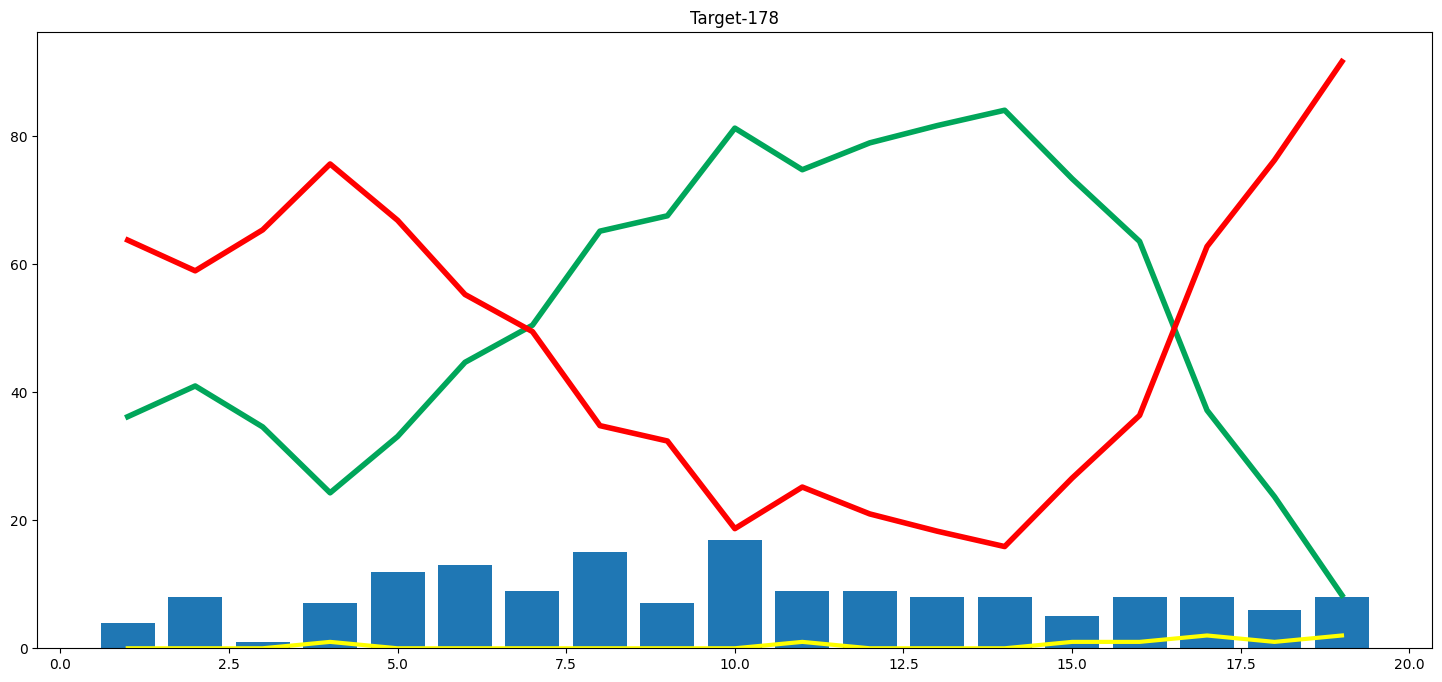

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [77]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [78]:
delivery_df["city"].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Dharamsala', 'Pune', 'Raipur',
       'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Cuttack', 'Visakhapatnam',
       'Mohali', 'Bengaluru'], dtype=object)

In [79]:
import pickle
pickle.dump(pipe,open("pipe.pkl","wb"))